In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scienceplots
import cv2
import os

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['font.size'] = 12
plt.rcParams['lines.markersize'] = 2.5
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = "#aaaaaa"
plt.rcParams['grid.alpha'] = 0.2
plt.rcParams['axes.grid.which'] = 'both'
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

T = lambda I: 108.0958765*I*I*I-511.9765339*I*I+1617.95649045*I+537.60415503

In [11]:
def row_method(image_path, crop=None, shift=1):
    img_array = cv2.imread(image_path, cv2.IMREAD_COLOR_RGB)
    if crop is not None:
        img_array = img_array[crop[0]:crop[1]]
    r,g,b = cv2.split(img_array)

    image_data = {
        'red': {
            'pixels': None,
            'mean': None,
            'std': None
        },
        'green': [],
        'blue': []
    }
    res = []
    for name, pixels in zip(['red', 'green', 'blue'], [r, g, b]):
        bri = []
        for x in range(pixels.shape[0]):
            y_max = np.argmax(pixels[x])
            mean = np.mean(pixels[x, y_max-shift:y_max+shift+1])
            bri.append(mean)
        res.append(bri)
    return res

def bri_mean_and_std(bri_array, xlim=(245,310)):
    res = []
    for rgb_bri in bri_array:
        mean = np.mean(rgb_bri[xlim[0]:xlim[1]])
        std = np.std(rgb_bri[xlim[0]:xlim[1]])
        res.append([mean, std])
    return res

def images_path():
    res = []
    for dirpath, dirnames, filenames in os.walk('.'):
        for filename in filenames:
            if filename.endswith('roi.png'):
                res.append(filename)
        break

    res = sorted(res)
    return res


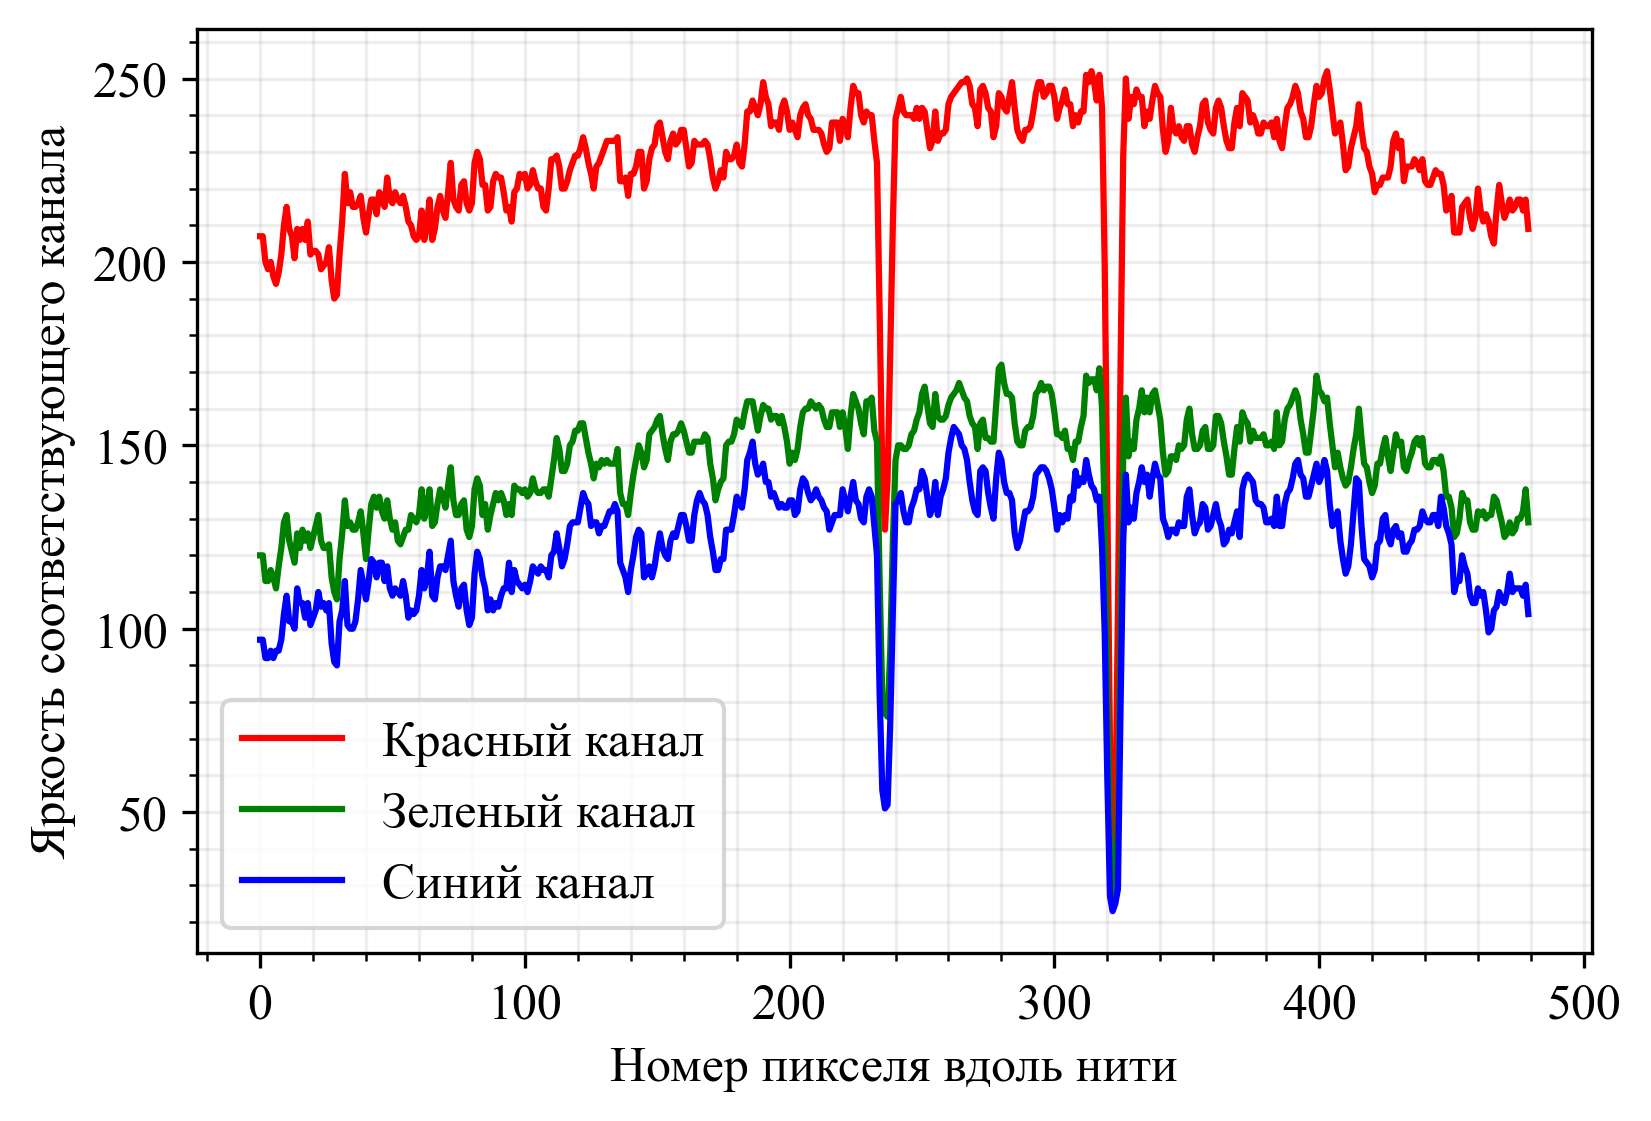

In [12]:
bri = row_method('1300_original.png', shift=0)
plt.plot(bri[0], 'r', label='Красный канал')
plt.plot(bri[1], 'g', label='Зеленый канал')
plt.plot(bri[2], 'b', label='Синий канал')

plt.legend()
plt.ylabel('Яркость соответствующего канала')
plt.xlabel('Номер пикселя вдоль нити')
plt.show()

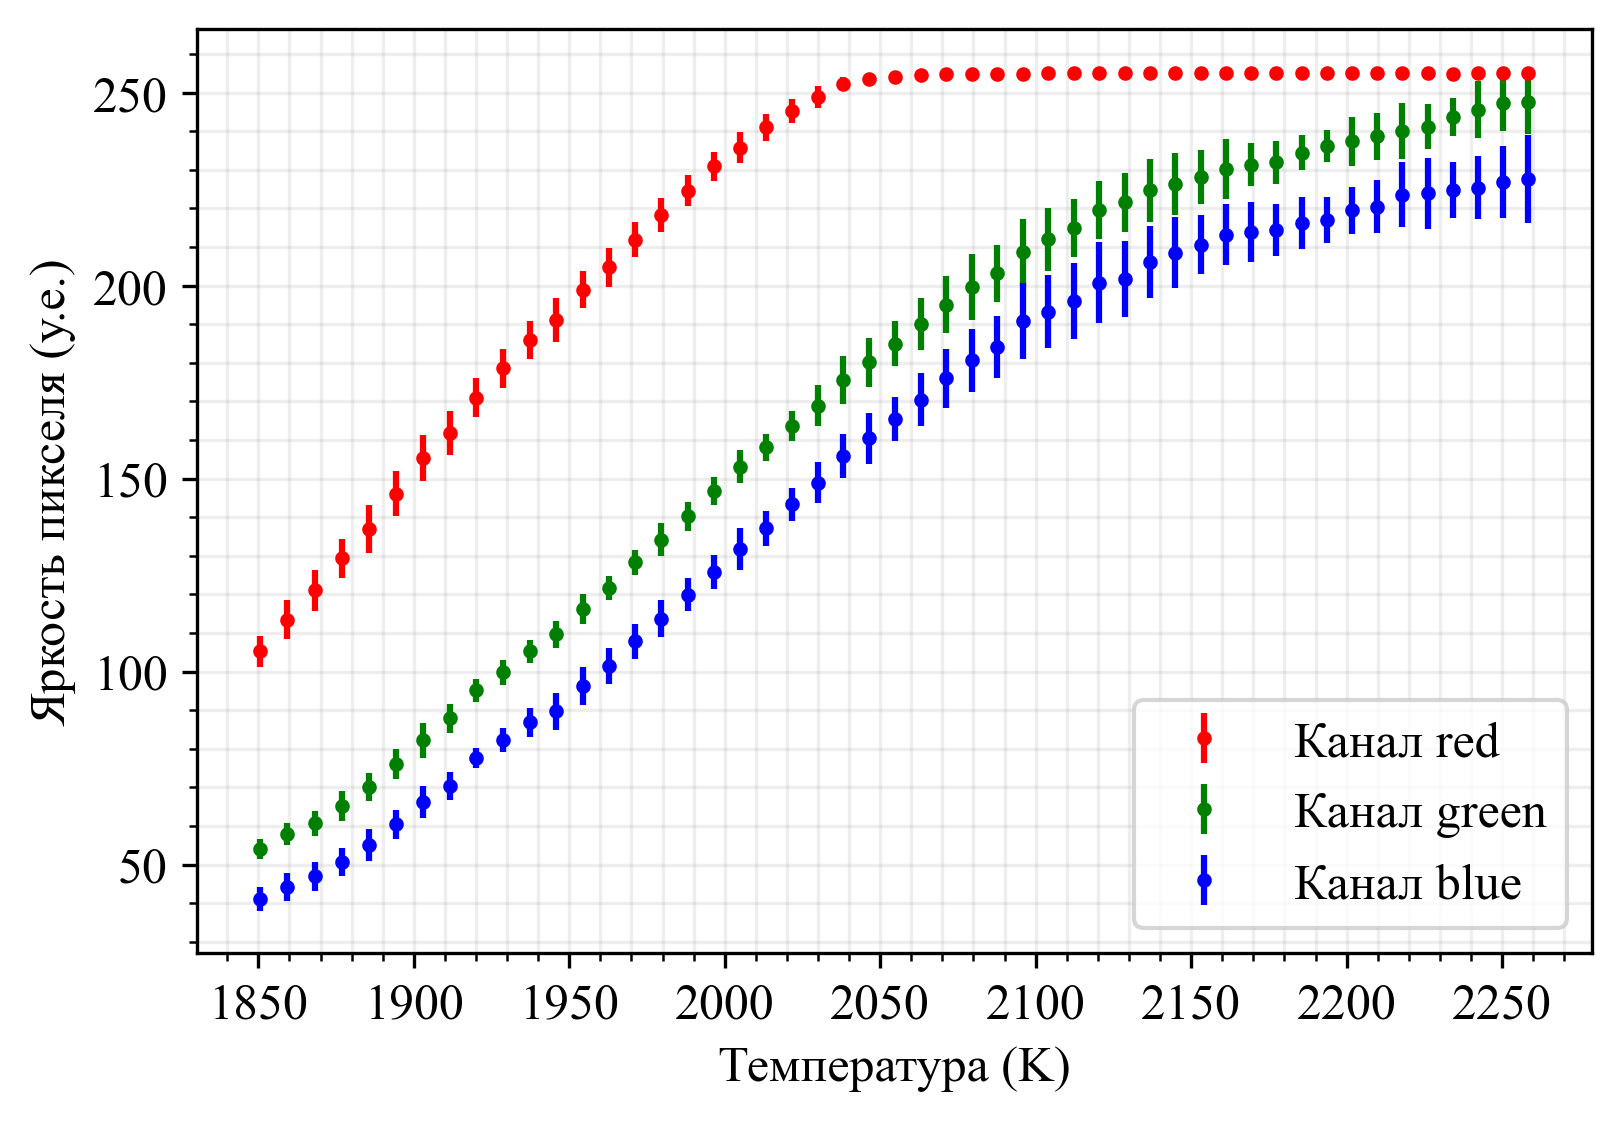

In [13]:
paths = images_path()
current = np.array([float(name.split('_')[0]) / 1e3 for name in paths])

res = {
    'red': {
        'mean': [],
        'std': []
    },
    'green': {
        'mean': [],
        'std': []
    },
    'blue': {
        'mean': [],
        'std': []
    }
}
for path in paths:
    bri_array = row_method(path, shift=0)
    r,g,b = bri_mean_and_std(bri_array)
    res['red']['mean'].append(r[0])
    res['green']['mean'].append(g[0])
    res['blue']['mean'].append(b[0])
    res['red']['std'].append(r[1])
    res['green']['std'].append(g[1])
    res['blue']['std'].append(b[1])

for color in ['red', 'green', 'blue']:
    plt.errorbar(T(current), res[color]['mean'], yerr=res[color]['std'], fmt='o', color=color, label=f'Канал {color}')

plt.xlabel('Температура (K)')
plt.ylabel('Яркость пикселя (у.е.)')
plt.legend()

plt.show()